<a href="https://colab.research.google.com/github/lanre1993/Individual-household-electric-power-consumption-Data-Set-/blob/master/temperaturehumidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
tf.__version__

'2.3.0'

In [2]:
import pandas as pd
from google.colab import files

In [4]:
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [6]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "weatherHistory.csv" with length 16294377 bytes


In [7]:
import io

In [8]:
weather_df = pd.read_csv('weatherHistory.csv')

In [9]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [10]:
weather_df.columns
weather_df.shape
weather_df.describe()
weather_df.info()
weather_df.isnull().any()
weather_df.isnull().all()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [11]:
round(100*(weather_df.isnull().sum()/len(weather_df.index)),2)

Formatted Date              0.00
Summary                     0.00
Precip Type                 0.54
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Humidity                    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Loud Cover                  0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64

In [12]:
weather_df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [13]:
weather_df.loc[weather_df['Precip Type'].isnull(),'Precip Type']='rain'

In [14]:
round(100*(weather_df.isnull().sum()/len(weather_df.index)),2)


Formatted Date              0.0
Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
Daily Summary               0.0
dtype: float64

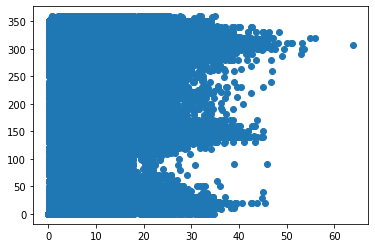

In [16]:
plt.scatter(x = 'Wind Speed (km/h)',y = 'Wind Bearing (degrees)',data=weather_df)

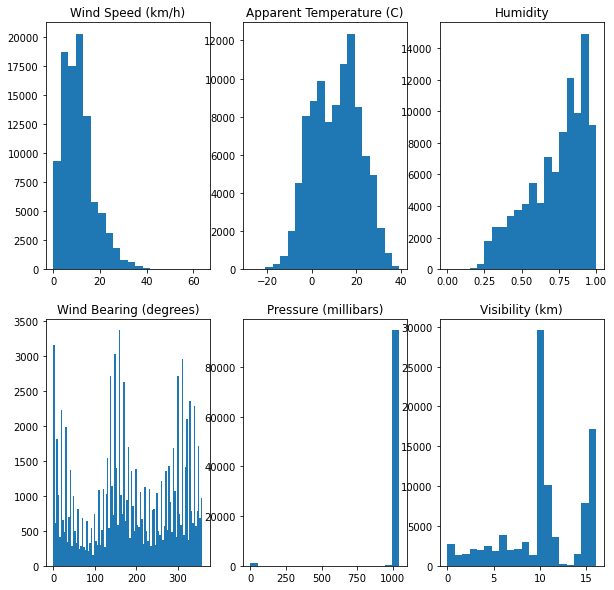

In [18]:

plt.figure(figsize = (10,10))
plt.subplot()
plt.subplot(2,3,1)
plt.title('Wind Speed (km/h)')
plt.hist(x = 'Wind Speed (km/h)',bins =20,data = weather_df)

plt.subplot(2,3,2)
plt.title('Apparent Temperature (C)')
plt.hist(x = 'Apparent Temperature (C)',bins =20,data = weather_df)

plt.subplot(2,3,3)
plt.title('Humidity')
plt.hist(x = 'Humidity',bins =20,data = weather_df)

plt.subplot(2,3,4)
plt.title('Wind Bearing (degrees)')
plt.hist(x = 'Wind Bearing (degrees)',bins =100,data = weather_df)

plt.subplot(2,3,5)
plt.title('Pressure (millibars)')
plt.hist(x = 'Pressure (millibars)',bins =20,data = weather_df)

plt.subplot(2,3,6)
plt.title('Visibility (km)')
plt.hist(x = 'Visibility (km)',bins =20,data = weather_df)

plt.show()

In [20]:
## Creating corellation metrics
weather_corr = weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)].corr()

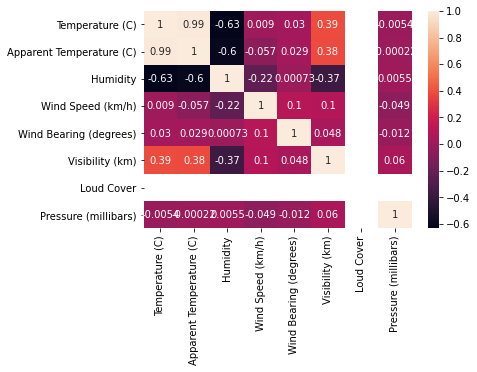

In [21]:
sns.heatmap(weather_corr,annot=True)

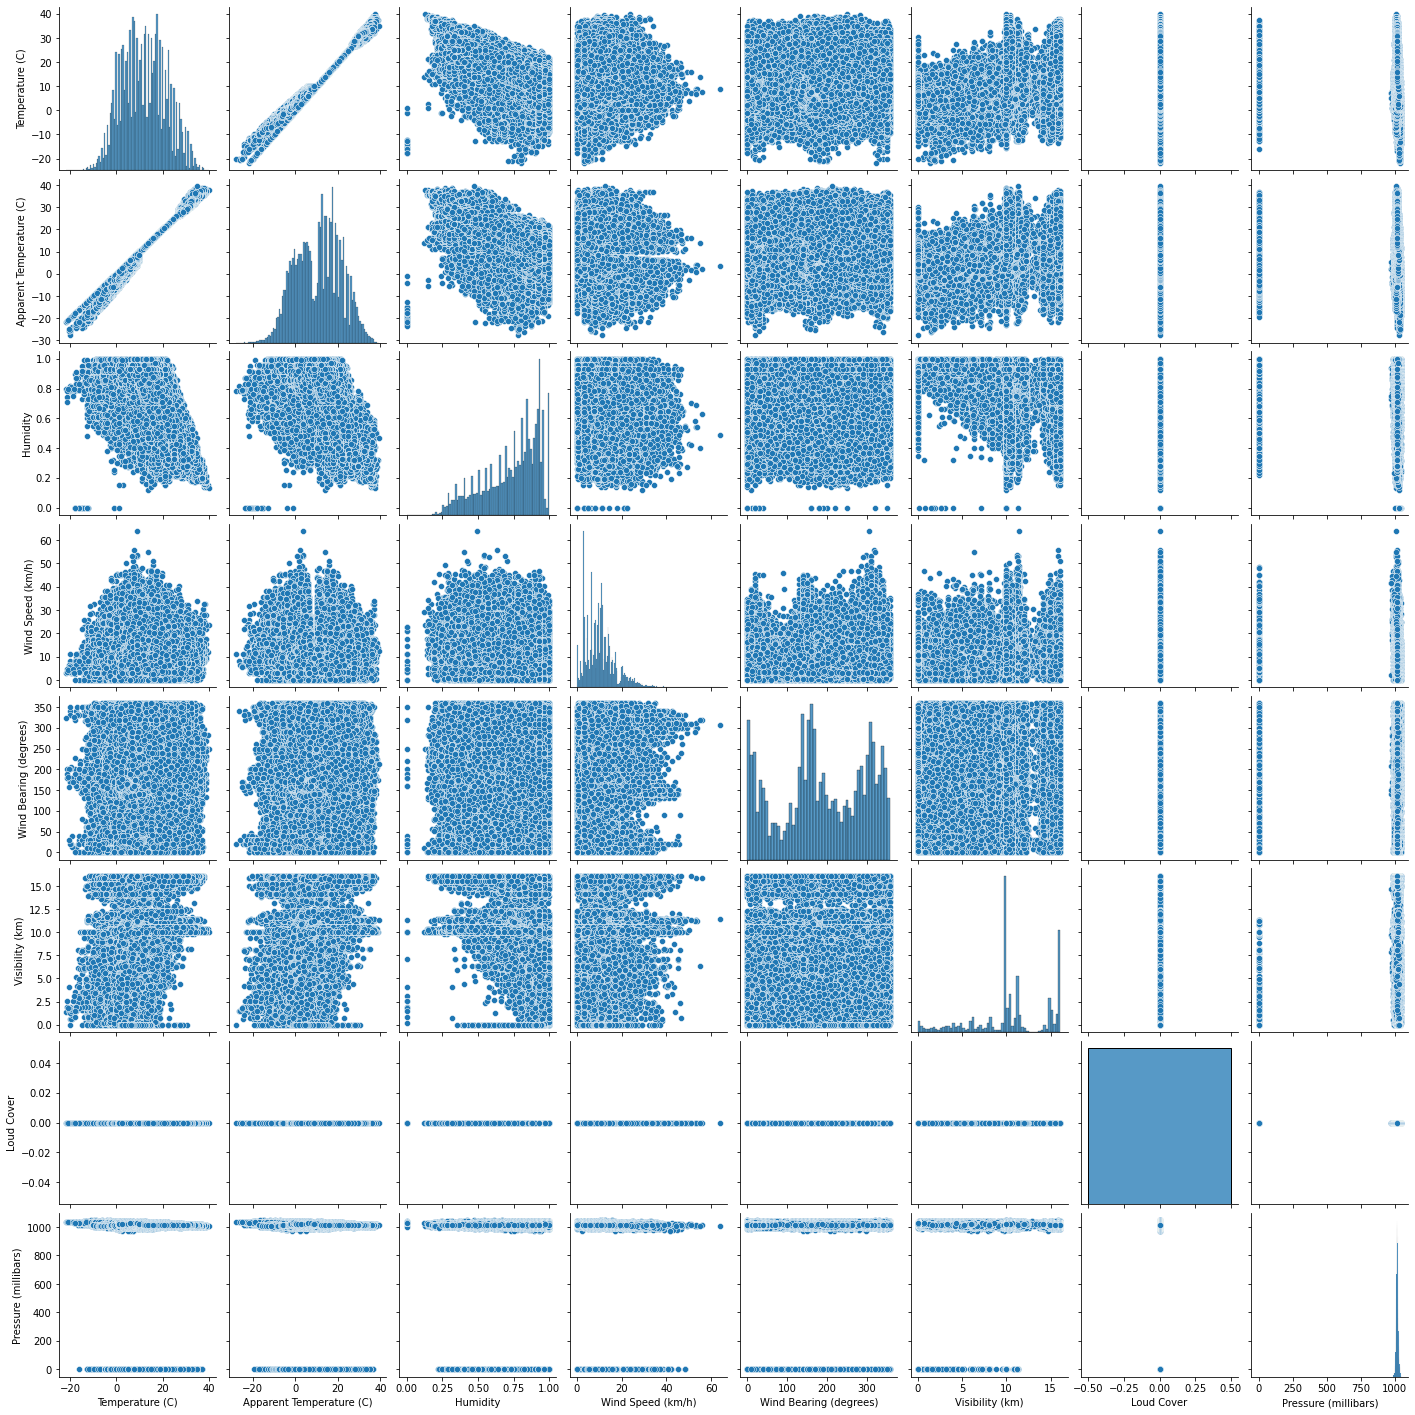

In [22]:
sns.pairplot(weather_df)

In [23]:
# Imputing binary values in type column 
weather_df.loc[weather_df['Precip Type']=='rain','Precip Type']=1
weather_df.loc[weather_df['Precip Type']=='snow','Precip Type']=0

In [24]:
weather_df_num=weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)]

In [26]:
weather_y = weather_df_num.pop('Temperature (C)')
weather_X = weather_df_num

In [27]:
train_X,test_X,train_y,test_y = train_test_split(weather_X,weather_y,test_size = 0.2,random_state=4)

In [28]:
train_X.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
70626,21.061111,0.31,12.5580,110.0,16.1000,0.0,1005.87
52457,25.016667,0.36,18.4989,352.0,10.3523,0.0,1025.36
90690,0.738889,0.89,17.1304,270.0,15.8263,0.0,1014.75
69528,13.772222,0.78,14.4900,300.0,15.8263,0.0,1014.56
92419,23.288889,0.82,6.3917,357.0,16.1000,0.0,1022.05


In [29]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
prediction = model.predict(test_X)

In [31]:
## Calculating the error 
np.mean((prediction-test_y)**2)

0.902274371188337

In [32]:
pd.DataFrame({'actual':test_y,
             'prediction':prediction,
             'diff':(test_y-prediction)})

,actual,prediction,diff
37443,-2.288889,-3.355714,1.066825
86534,8.861111,9.418530,-0.557419
2082,9.805556,9.701321,0.104235
53130,27.222222,27.096837,0.125385
45196,17.705556,17.302053,0.403503
...,...,...,...
55387,-10.066667,-11.960987,1.894320
25976,9.972222,9.831699,0.140523
32423,12.777778,15.436904,-2.659127
26570,15.277778,16.307788,-1.030010
